# Calculate the limb darkening coefficient priors

We use the power-2 limb darkening law.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%run toi_2266.py

In [29]:
from ldtk import LDPSetCreator, tess, sdss_g, sdss_r, sdss_i, sdss_z
from ldtk.ldmodel import ld_power_2_pm, ld_quadratic_tri

In [30]:
sc = LDPSetCreator((star_teff.n, star_teff.s), (star_logg.n, star_logg.s), (star_z.n, star_z.s), 
              [tess, sdss_g, sdss_r, sdss_i, sdss_z], dataset='vis-lowres')

In [31]:
ps = sc.create_profiles(2500)

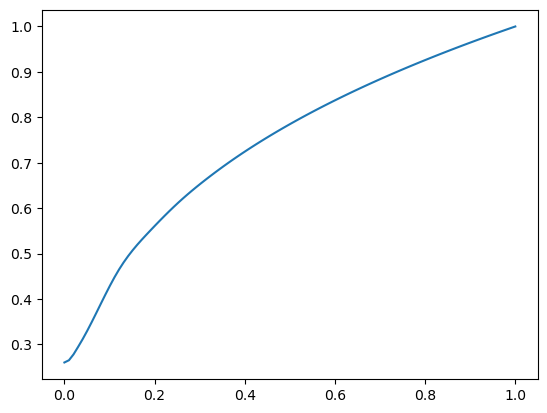

In [32]:
plot(ps._mu, ps.profile_averages[0])

In [33]:
tq, tqe = ps.coeffs_tq()

In [35]:
p2mp, p2mpe = ps.coeffs_p2mp()

In [48]:
for i,pb in enumerate('tess g r i z_s'.split()):
    for j in range(2):
        print(f"self.set_prior('q{j+1}_{pb}', 'NP', {p2mp[i,j]:.2f}, {5*p2mpe[i,j]:.3f})")

self.set_prior('q1_tess', 'NP', 0.78, 0.008)
self.set_prior('q2_tess', 'NP', 0.69, 0.124)
self.set_prior('q1_g', 'NP', 0.64, 0.014)
self.set_prior('q2_g', 'NP', 0.61, 0.070)
self.set_prior('q1_r', 'NP', 0.65, 0.015)
self.set_prior('q2_r', 'NP', 0.56, 0.079)
self.set_prior('q1_i', 'NP', 0.74, 0.012)
self.set_prior('q2_i', 'NP', 0.68, 0.131)
self.set_prior('q1_z_s', 'NP', 0.79, 0.011)
self.set_prior('q2_z_s', 'NP', 0.71, 0.155)


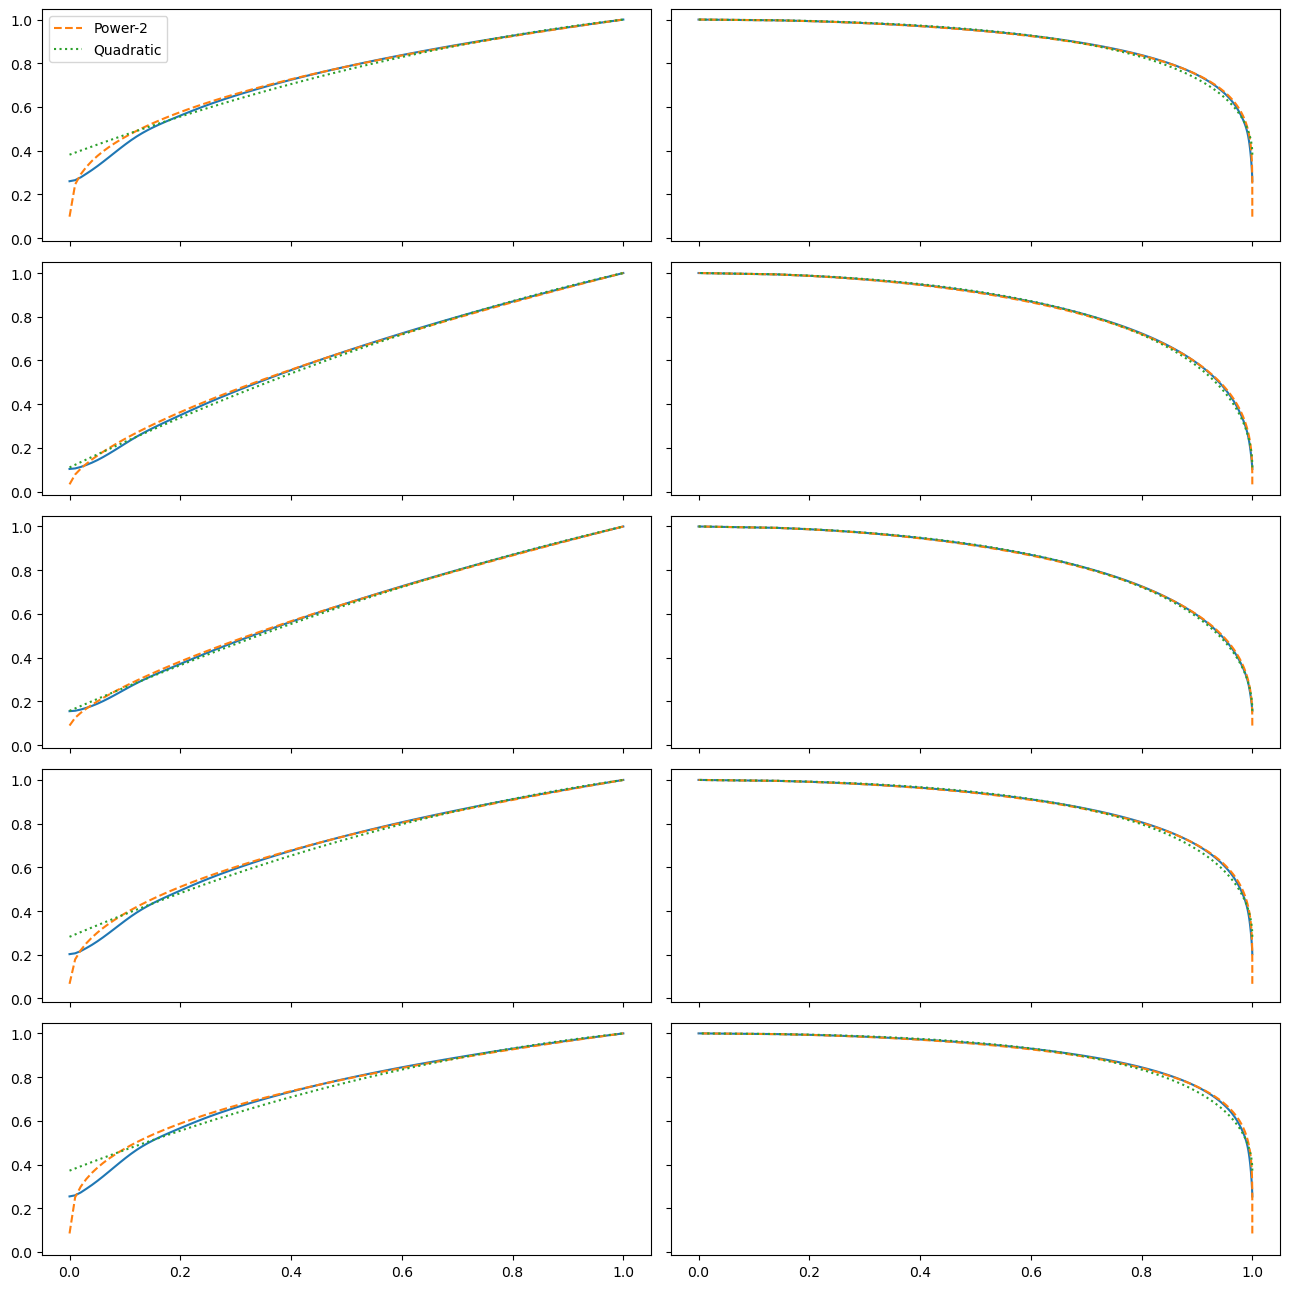

In [39]:
fig, axs = subplots(5, 2, sharey='all', sharex='col', figsize=(13,13))
for i in range(5):
    axs[i,0].plot(ps._mu, ps.profile_averages[i])
    axs[i,0].plot(ps._mu, ld_power_2_pm(ps._mu, p2mp[i]), '--', label='Power-2')
    axs[i,0].plot(ps._mu, ld_quadratic_tri(ps._mu, tq[i]), ':', label='Quadratic')
    axs[i,1].plot(ps._z, ps.profile_averages[i])
    axs[i,1].plot(ps._z, ld_power_2_pm(ps._mu, p2mp[i]), '--')
    axs[i,1].plot(ps._z, ld_quadratic_tri(ps._mu, tq[i]), ':')
axs[0,0].legend()
fig.tight_layout()